<a href="https://colab.research.google.com/github/pao0318/Tensorflow2-Imperial-College-London/blob/main/Multiple_I_P_and_O_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Inputs and Outputs

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
pd_dat=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datas imperial/diagnosis.csv') 

In [4]:
dataset=pd_dat.values

In [19]:
# SPLITTING THE DATA
X_train,X_test, Y_train, Y_test=train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [9]:
df=[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
df

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [20]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

BUILD THE MODEL

In [24]:
from tensorflow.keras import Input, layers
shape_inputs=(1,)
temperature=Input(shape=shape_inputs, name='temp')
nausea_occurence=Input(shape=shape_inputs, name='nocc')
lumbar_pain=Input(shape=shape_inputs, name='lumbp')
urine_pushing=Input(shape=shape_inputs, name='up')
micturition_pains=Input(shape=shape_inputs, name='mict')
bis=Input(shape=shape_inputs, name='bis')

In [25]:
# List of all inputs
list_inputs=[temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains,bis]

In [26]:
# Merging all input features
x=layers.concatenate(list_inputs)

In [27]:
# logistic regression classifier
inflamation_pred=layers.Dense(1,activation='sigmoid', name='inflam')(x)
nephritis_pred=layers.Dense(1,activation='sigmoid', name='nephr')(x)

In [28]:
# list of all the outputs
list_outputs=[inflamation_pred,nephritis_pred]

In [29]:
# Create the model object
model=tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

In [ ]:
# Plot the model
tf.keras.utils.plot_model(model,'mulit_input')

**Compile the model**

In [32]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss={'inflam':'binary_crossentropy',
                    'nephr':'binary_crossentropy'},
              metrics={'inflam':['acc'],
                       'nephr':['acc']},
              loss_weights=[1.,0.2]
              )

Fit the model

In [33]:
inputs_train=[temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
outputs_train=[inflam_train, nephr_train ]

In [34]:
history=model.fit(inputs_train, outputs_train, epochs=1000, batch_size=128,verbose=False)

**Plot the learning curves**

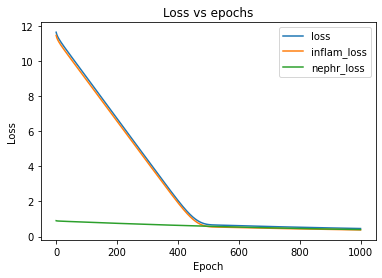

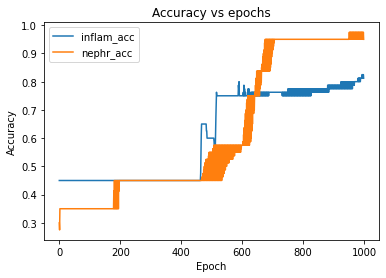

In [38]:
acc_keys=[k for k in history.history.keys() if k in ('inflam_acc','nephr_acc')]
loss_keys=[k for k in history.history.keys() if not k in acc_keys]

for k,v in history.history.items():
  if k in acc_keys:
    plt.figure(1)
    plt.plot(v)
  else:
    plt.figure(2)
    plt.plot(v)


plt.figure(1)
plt.title('Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys)  

plt.figure(2)
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys)

plt.show()



In [40]:
# Evaluate the model
model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],
               [inflam_test, nephr_test ],verbose=2)

2/2 - 0s - loss: 0.6119 - inflam_loss: 0.5200 - nephr_loss: 0.4593 - inflam_acc: 0.6750 - nephr_acc: 0.9000


[0.611880362033844,
 0.5200189352035522,
 0.4593070447444916,
 0.675000011920929,
 0.8999999761581421]